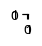

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
f,a = plt.subplots(1,1,figsize=(1e-2, 1e-2))
mpl.rcParams['figure.dpi'] = 180
sns.set_style('darkgrid')
import os,sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import warnings
warnings.filterwarnings("ignore")
import itertools
from tqdm.auto import tqdm
from datetime import datetime as dt
from src.utils import mkdirs, convert_path, pkl_dump, pkl_load, display_side, add_median_labels, get_palette

PAL = sns.color_palette('hsv', n_colors=13)
HSV = [PAL[-4], PAL[-1], PAL[0], PAL [4]]
tmppal = sns.color_palette('hsv', n_colors=15)
NEWPAL = HSV + [tmppal[-3], tmppal[7]]
mpl.rcParams['figure.dpi'] = 180

In [3]:
df = pd.read_excel('../data/aligned_icore/231017_zeynep_extra_data_neoepitopes.xlsx')
df.rename(columns={'Sequence':'Peptide', 'Ref.Sequence':'wild_type', 'gene_TPM':'Total_Gene_TPM'}, inplace=True)
df.head(2)

,pat,gene_name,hgvs_dna,hgvs_protein,variant_id,Peptide,wild_type,nrm_alt_freq,tum_alt_freq,rna_alt_freq,Total_Gene_TPM,IFNg,IL5,any,both
0,Hu_048,'ATRX,c.5390T>C,p.Val1797Ala,1328383,STMVDARVMKKRAHILYEML,STMVDVRVMKKRAHILYEML,0.0,0.6797,0.8957,144.452,True,True,True,True
1,Hu_048,'ATRX,c.5390T>C,p.Val1797Ala,1328383,PIQNGQCADSTMVDARVMKK,PIQNGQCADSTMVDVRVMKK,0.0,0.6797,0.8957,144.452,False,False,False,False


In [498]:
def get_in_ref(peptide, hla, ref):
    return len(ref.query('Peptide==@peptide and HLA == @hla'))==1

In [502]:
cedar['in_prime'] = cedar.apply(lambda x: get_in_ref(x['Peptide'], x['HLA'], prime), axis=1)

In [504]:
cedar = pd.read_csv('../data/pepx/230308_cedar_aligned_pepx_fold.csv').assign(in_cedar = True, db = 'cedar')
prime = pd.read_csv('../data/pepx/230308_prime_aligned_pepx.csv').assign(in_prime = True, db = 'prime')
nepdb = pd.read_csv('../data/pepx/230308_nepdb_aligned_pepx.csv').assign(in_nepdb = True, db = 'nepdb')
prime_filt = prime.query('Peptide not in @cedar.Peptide.unique()')

cedar['in_prime'] = cedar.apply(lambda x: get_in_ref(x['Peptide'], x['HLA'], prime), axis=1)
cedar['in_nepdb'] = cedar.apply(lambda x: get_in_ref(x['Peptide'], x['HLA'], nepdb), axis=1)

prime['in_cedar'] = prime.apply(lambda x: get_in_ref(x['Peptide'], x['HLA'], cedar), axis=1)
prime['in_nepdb'] = prime.apply(lambda x: get_in_ref(x['Peptide'], x['HLA'], nepdb), axis=1)

nepdb['in_prime'] = nepdb.apply(lambda x: get_in_ref(x['Peptide'], x['HLA'], prime), axis=1)
nepdb['in_cedar'] = nepdb.apply(lambda x: get_in_ref(x['Peptide'], x['HLA'], cedar), axis=1)


In [541]:
new_nepdb = nepdb.query('not in_prime and not in_cedar')
new_nepdb.drop(columns=['Unnamed: 0.1', 'Unnamed: 0']).to_csv('../data/pepx/231018_nepdb_new_filtered.csv', index=False)

In [560]:
new_nepdb[['Peptide','wild_type','HLA','Total_Gene_TPM']].to_csv('../../new_nepdb.txt', index=False,header=False)

# Remake merged dataset

In [500]:
len(prime.query('Peptide=="FICAIIVVV" and HLA=="HLA-B2705"'))==1

False

In [496]:
prime.query('Peptide=="FICAIIVVV" or Peptide=="FLGAGLFLYF"')[['Peptide','HLA', 'agg_label', 'in_prime', 'in_cedar']]

,Peptide,HLA,agg_label,in_prime,in_cedar
458,FICAIIVVV,HLA-A0201,1,True,True
508,FLGAGLFLYF,HLA-A0201,1,True,True


In [497]:
cedar.query('Peptide=="FICAIIVVV" or Peptide=="FLGAGLFLYF"')[['Peptide','HLA', 'agg_label', 'in_prime', 'in_cedar']]

,Peptide,HLA,agg_label,in_prime,in_cedar
435,FICAIIVVV,HLA-B2705,1,True,True
482,FLGAGLFLYF,HLA-B2705,1,True,True


In [492]:
cp_merged.query('Peptide=="FICAIIVVV" or Peptide=="FLGAGLFLYF"')

,Peptide,HLA,EL_rank_mut,agg_label,EL_rank_wt,EL_rank_wt_aligned,Total_Gene_TPM,Total_Peptide_TPM,Total_Scaled_Peptide_TPM,VHSE1,...,len_icore_mut,seq_id,trueHLA_EL_rank,wild_type,foreignness_score,ratio_rank,in_cedar,db,in_prime,in_nepdb
818,FICAIIVVV,HLA-A0201,1.2167,1,0.4979,0.4979,7.70076,7.701,6.299,0.882222,...,9,seq_0818,1.2167,FIGAIIVVV,0.000000e+00,1.756505,True,prime,True,False
819,FICAIIVVV,HLA-B2705,31.8000,1,39.2000,39.2000,7.70076,7.701,6.299,0.882222,...,9,seq_0819,31.8000,FIGAIIVVV,0.000000e+00,6.003061,True,cedar,True,False
910,FLGAGLFLYF,HLA-B2705,14.9934,1,16.7423,21.9474,211.50600,211.506,123.178,0.831111,...,9,seq_0910,26.1579,FLGAGLFIYF,3.475804e-09,4.750636,True,cedar,True,False
911,FLGAGLFLYF,HLA-A0201,1.7144,1,3.2829,3.2829,211.50600,211.506,123.178,0.858750,...,8,seq_0911,5.9479,FLGAGLFIYF,3.475804e-09,0.819104,True,prime,True,False


In [490]:
for i, row in cp_merged.query('in_cedar').iterrows():
    pep=row['Peptide']
    hla=row['HLA']
    if len(cedar.query("Peptide==@pep and HLA==@hla")) != 1 :
        print(i, row[['Peptide', 'HLA', 'agg_label', 'in_prime', 'in_cedar']], '\n')

818 Peptide      FICAIIVVV
HLA          HLA-A0201
agg_label            1
in_prime          True
in_cedar          True
Name: 818, dtype: object 

911 Peptide      FLGAGLFLYF
HLA           HLA-A0201
agg_label             1
in_prime           True
in_cedar           True
Name: 911, dtype: object 



In [487]:
for i, row in cp_merged.query('in_prime').iterrows():
    pep=row['Peptide']
    hla=row['HLA']
    if len(prime.query("Peptide==@pep and HLA==@hla")) != 1 :
        print(i, row[['Peptide', 'HLA', 'agg_label', 'in_prime', 'in_cedar']], '\n')

93 Peptide      ALAQKGVQL
HLA          HLA-B0702
agg_label            0
in_prime          True
in_cedar          True
Name: 93, dtype: object 

819 Peptide      FICAIIVVV
HLA          HLA-B2705
agg_label            1
in_prime          True
in_cedar          True
Name: 819, dtype: object 

910 Peptide      FLGAGLFLYF
HLA           HLA-B2705
agg_label             1
in_prime           True
in_cedar           True
Name: 910, dtype: object 

963 Peptide      FLMASISSF
HLA          HLA-B3501
agg_label            0
in_prime          True
in_cedar          True
Name: 963, dtype: object 

964 Peptide      FLMASISSF
HLA          HLA-B0702
agg_label            0
in_prime          True
in_cedar          True
Name: 964, dtype: object 

1020 Peptide      FLVYGVRPGM
HLA           HLA-B1501
agg_label             0
in_prime           True
in_cedar           True
Name: 1020, dtype: object 

2238 Peptide      KQWLVWLFL
HLA          HLA-A0201
agg_label            1
in_prime          True
in_cedar         

In [505]:
cp_merged = pd.concat([cedar, prime]).drop(columns=['Unnamed: 0.1' ,'Unnamed: 0','fold']).sort_values('Peptide').reset_index(drop=True)
cpn_merged = pd.concat([cedar, prime, nepdb]).drop(columns=['Unnamed: 0.1' ,'Unnamed: 0', 'fold', 'EL_rank_exp']).sort_values('Peptide').reset_index(drop=True)

In [440]:
cp_merged['newdb'] = cp_merged.apply(lambda x: get_db(x['in_cedar'], x['in_prime'],  x['in_nepdb']), axis=1)

In [506]:
cp_merged = cp_merged.drop_duplicates(subset=['Peptide','HLA','agg_label'])
cpn_merged = cpn_merged.drop_duplicates(subset=['Peptide','HLA','agg_label'])

cp_merged.loc[cp_merged.duplicated(subset=['Peptide','HLA'], keep=False), ['agg_label']]=1
cpn_merged.loc[cpn_merged.duplicated(subset=['Peptide','HLA'], keep=False), ['agg_label']]=1
cp_merged = cp_merged.drop_duplicates(subset=['Peptide','HLA', 'agg_label']).sort_values('Peptide').reset_index(drop=True)
cpn_merged = cpn_merged.drop_duplicates(subset=['Peptide','HLA', 'agg_label']).sort_values('Peptide').reset_index(drop=True)
print(len(cp_merged), len(cpn_merged))
cp_merged['seq_id']= [f'seq_{i:04}' for i in range(len(cp_merged))]
cpn_merged['seq_id']= [f'seq_{i:04}' for i in range(len(cpn_merged))]
cp_merged['Peptide'].to_csv('../../kern_dist/data/231018_cp_merged.pep', index=False, header=False)
cpn_merged['Peptide'].to_csv('../../kern_dist/data/231018_cpn_merged.pep', index=False, header=False)

5581 5651


In [540]:
pd.read_csv(

,Unnamed: 0.1,Unnamed: 0,HLA,agg_label,Peptide,wild_type,icore_mut,core_mut,len,EL_rank_mut,...,Total_Peptide_TPM,Total_Scaled_Peptide_TPM,Total_Gene_TPM,foreignness_score,ratio_rank,EL_rank_exp,in_nepdb,db,in_prime,in_cedar
0,0,0,HLA-A3101,1,AFGSAHLFR,AFGSAHLYR,AFGSAHLFR,AFGSAHLFR,9,0.2470,...,2.221,0.740,2.220990,0.000000e+00,0.065546,0.9756,True,nepdb,False,False
9,9,9,HLA-A0101,0,ASIRNANLY,ASIRDANLY,ASIRNANLY,ASIRNANLY,9,0.2469,...,0.293,0.235,0.292993,0.000000e+00,0.101242,0.5963,True,nepdb,False,False
20,20,20,HLA-A0101,0,CVDSPPPLF,CVDSPPPLS,CVDSPPPLF,CVDSPPPLF,9,0.2420,...,0.001,0.001,0.001000,5.000000e-01,0.216202,1.7594,True,nepdb,False,False
22,22,22,HLA-A2601,0,DLIEIFRFGY,DLIEIFRLGY,DLIEIFRFGY,DLIEIFRGY,10,0.1187,...,75.479,75.479,75.478800,0.000000e+00,0.023476,0.0382,True,nepdb,False,False
23,23,23,HLA-A2601,0,DMIFFSIDRY,DMISFSIDRY,MIFFSIDRY,MIFFSIDRY,10,0.1346,...,0.341,0.171,0.340990,0.000000e+00,0.074590,1.4389,True,nepdb,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,217,217,HLA-A2601,0,YMAELFSFI,YMAELFPFI,YMAELFSFI,YMAELFSFI,9,3.5923,...,1.501,0.857,1.500980,0.000000e+00,0.166143,13.3760,True,nepdb,False,False
225,225,225,HLA-A2601,0,YTFLIFSDY,YTFLISSDY,YTFLIFSDY,YTFLIFSDY,9,0.1328,...,30.211,20.151,30.211000,0.000000e+00,0.086279,0.2629,True,nepdb,False,False
226,226,226,HLA-A2601,0,YTIEEFMEL,YTMEEFMEL,YTIEEFMEL,YTIEEFMEL,9,0.0888,...,0.141,0.035,0.141003,2.064928e-13,0.041154,1.0956,True,nepdb,False,False
230,230,230,HLA-A2601,0,YVKLANLSY,YVKLANLPY,YVKLANLSY,YVKLANLSY,9,0.0914,...,0.001,0.001,0.001000,0.000000e+00,0.055972,1.1676,True,nepdb,False,False


In [509]:
from src.partition_tools import pipeline_stratified_kfold
cp_merged_fold = pipeline_stratified_kfold('../../kern_dist/out/231018_cp_merged.pep_0.9.out', cp_merged, k=10, elrank_col='EL_rank_mut').drop_duplicates(subset=['seq_id'])
cpn_merged_fold = pipeline_stratified_kfold('../../kern_dist/out/231018_cpn_merged.pep_0.9.out', cpn_merged, k=10, elrank_col='EL_rank_mut').drop_duplicates(subset=['seq_id'])

start 5581
read hobohm 4134 1529
strat kfold unique 4134 1529
manually reassign identical 4134 1529
manually reassign related 4134 1529
concat 5663
merge 5663
drop duplicated 5581
start 5651
read hobohm 4175 1563
strat kfold unique 4175 1563
manually reassign identical 4175 1563
manually reassign related 4175 1563
concat 5738
merge 5738
drop duplicated 5651


In [510]:
print(len(cp_merged_fold), len(cpn_merged_fold))

5581 5651


In [511]:
from src.mutation_tools import pipeline_mutation_scores
from src.data_processing import get_aa_properties
cp_merged_fold = pipeline_mutation_scores(cp_merged_fold, 'icore_mut', 'icore_wt_aligned', ics_kl, 0.2, prefix='icore_')
cp_merged_fold, _ = get_aa_properties(cp_merged_fold, seq_col = 'icore_mut', do_vhse=False, prefix='icore_')
cpn_merged_fold = pipeline_mutation_scores(cpn_merged_fold, 'icore_mut', 'icore_wt_aligned', ics_kl, 0.2, prefix='icore_')
cpn_merged_fold, _ = get_aa_properties(cpn_merged_fold, seq_col  = 'icore_mut', do_vhse=False, prefix='icore_')
cp_merged_fold['ratio_rank'] = cp_merged_fold.apply(lambda x: abs(x['EL_rank_mut']-x['EL_rank_wt_aligned']) * x['EL_rank_mut'] / x['EL_rank_wt_aligned'], axis=1)
cpn_merged_fold['ratio_rank'] = cpn_merged_fold.apply(lambda x: abs(x['EL_rank_mut']-x['EL_rank_wt_aligned']) * x['EL_rank_mut'] / x['EL_rank_wt_aligned'], axis=1)

In [515]:
cp_merged_fold['flag']=True
cpn_merged_fold['flag']=True

In [634]:
cp_merged_fold['icore_dissimilarity_score']

0       0.994706
1       0.994706
2       0.993547
3       0.953264
4       0.978725
          ...   
5658    0.981957
5659    0.927951
5660    0.974386
5661    0.974386
5662    0.969539
Name: icore_dissimilarity_score, Length: 5581, dtype: float64

In [631]:
cp_merged_fold.query('not in_nepdb')

,Peptide,HLA,EL_rank_mut,agg_label,fold,EL_rank_wt,EL_rank_wt_aligned,Total_Gene_TPM,Total_Peptide_TPM,Total_Scaled_Peptide_TPM,...,len_icore_mut,ratio_rank,seq_id,trueHLA_EL_rank,wild_type,icore_aliphatic_index,icore_boman,icore_hydrophobicity,icore_isoelectric_point,flag
0,AAAAAAAAVL,HLA-B0702,0.9883,0,2,2.6958,3.9965,26.26140,26.261,8.165,...,9,0.743902,seq_0000,3.6567,AAAAAAAAVI,153.333333,-2.403333,2.288889,6.100000,True
1,AAAAAAAVL,HLA-B0702,0.9883,0,2,3.9965,3.9965,26.26140,26.261,8.165,...,9,0.743902,seq_0001,0.9883,AAAAAAAVI,153.333333,-2.403333,2.288889,6.100000,True
2,AAAAAAQQIQV,HLA-B0702,3.9712,0,0,1.0441,1.0441,4.41098,4.411,2.942,...,9,11.133129,seq_0002,26.7692,AAAAAAQQLQV,110.000000,-0.522222,0.922222,6.100000,True
3,AAAALHMQR,HLA-A1101,0.3609,0,4,0.3717,0.3717,5.33098,5.331,1.066,...,9,0.010486,seq_0003,0.3609,AAAALHMLR,87.777778,1.178889,0.188889,10.551759,True
4,AAAAQQIQV,HLA-B0702,4.9092,0,0,4.7746,4.7746,4.41098,4.411,2.942,...,9,0.138394,seq_0005,4.9092,AAAAQQLQV,120.000000,0.046667,0.600000,6.100000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5658,YYNFEGDIALL,HLA-A2402,0.6247,0,6,0.7584,0.7584,108.54900,108.549,43.420,...,11,0.110130,seq_5576,0.6247,SYNFEGDIALL,115.454545,0.178182,0.290909,3.550073,True
5659,YYPGKKEPF,HLA-A2402,0.0965,0,9,0.0817,0.0817,12671.50000,12671.500,12671.500,...,9,0.017481,seq_5577,0.0965,YYSGKKEPF,0.000000,1.585556,-1.633333,9.121620,True
5660,YYSKNLNSF,HLA-A2402,0.0033,1,6,4.6860,4.6860,2.26106,2.261,0.647,...,9,0.003298,seq_5578,0.0033,YYSKNLNSS,43.333333,2.001111,-0.944444,9.145600,True
5661,YYSKNLNSFF,HLA-A2402,0.0033,1,6,0.0350,4.6860,2.26106,2.261,0.647,...,9,0.003298,seq_5579,0.0310,YYSKNLNSSF,43.333333,2.001111,-0.944444,9.145600,True


In [521]:
cp_merged_fold.query('not in_nepdb').drop(columns=['in_nepdb']).to_csv('../data/pepx/231018_cedar_prime_merged_fold.csv', index=False)
cpn_merged_fold.to_csv('../data/pepx/231018_cedar_prime_nepdb_merged_fold.csv', index=False)

In [534]:
list(filter(lambda x: 'in_' in x or 'flag' in x, pd.read_csv('../data/pepx/231018_cedar_prime_merged_fold.csv').columns)), list(filter(lambda x: 'in_' in x or 'flag' in x, pd.read_csv('../data/pepx/231018_cedar_prime_nepdb_merged_fold.csv').columns))

(['in_cedar', 'in_prime', 'flag'],
 ['in_cedar', 'in_nepdb', 'in_prime', 'flag'])

In [96]:
# Defining mut cols 
mcs = []
prefix='icore_'
cols_ = [f'{prefix}aliphatic_index', f'{prefix}boman', f'{prefix}hydrophobicity',
         f'{prefix}isoelectric_point','icore_dissimilarity_score', 'icore_blsm_mut_score', 'ratio_rank',
         'EL_rank_wt_aligned', 'foreignness_score', 'Total_Gene_TPM']

for L in range(0, len(cols_) + 1):
    for mc in itertools.combinations(cols_, L):
        mcs.append(list(mc))

len(mcs)

1024

In [103]:
# Checking the baseline
baseline = pkl_load('../output/baseline_bootstrapped.pkl')
baseline.keys(), baseline['Peptide'].keys(), len(baseline['Peptide']['PRIME'])

# --> These seem to be bootstrapped DFs (n=10k) for each of the evaluation sets, surely trained using each input and their rank and nothing else

(dict_keys(['Peptide', 'ICORE']),
 dict_keys(['CEDAR', 'PRIME', 'NEPDB']),
 10000)

In [532]:
cpn_merged.query('in_nepdb and not in_prime').groupby(['agg_label']).count()

,Peptide,HLA,EL_rank_mut,EL_rank_wt,EL_rank_wt_aligned,Total_Gene_TPM,Total_Peptide_TPM,Total_Scaled_Peptide_TPM,VHSE1,VHSE3,...,len_icore_mut,seq_id,trueHLA_EL_rank,wild_type,foreignness_score,ratio_rank,in_cedar,db,in_prime,in_nepdb
agg_label,,,,,,,,,,,,,,,,,,,,,
0,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
1,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


# Checks with viral 

In [9]:
neoepi = pd.read_csv('../data/neoepi_viral/cedar.csv')
viral = pd.read_csv('../data/neoepi_viral/viral.csv')
display(viral.head(3)), display(neoepi.head(3))

,sequence,HLA,EL_rank_mut,agg_label,agg_label.1
0,TVTSTPVQGR,HLA-A6801,0.039,1,1
1,TVYPPSSTAK,HLA-A0301,0.006,1,1
2,AEWPTFNVGW,HLA-B4403,0.015,1,1


,sequence,HLA,EL_rank_mut,trueHLA_EL_rank,agg_label
0,AAAAAAQQI,HLA-B0702,3.9712,26.7692,0
1,AAAAQQIQV,HLA-B0702,4.9092,4.9092,0
2,AAAAQQIQV,HLA-A0201,1.9555,1.9555,0


(None, None)

In [30]:
from src.data_processing import get_array_dataset, encode_batch, encode_batch_weighted, batch_compute_frequency, AA_KEYS
w = AA_KEYS.index('W')
ics_kl = pkl_load('../data/ic_dicts/ics_kl_new.pkl')
viral['W_count'] = viral.sequence.apply(lambda x: x.count('W'))
neoepi['W_count'] = neoepi.sequence.apply(lambda x: x.count('W'))

In [36]:
print(get_array_dataset(viral, ics_kl, seq_col='sequence', mask=True, add_rank=False, threshold=0.2)[0].mean(axis=0)[w])
print(get_array_dataset(neoepi, ics_kl, seq_col='sequence', mask=True, add_rank=False, threshold=0.2)[0].mean(axis=0)[w])

0.006958562513318169
0.013640526597994496


In [670]:
from scipy.stats import ttest_ind
viral_neg = get_array_dataset(viral.query('agg_label==0'), None, seq_col='sequence', mask=False, add_rank=False, threshold=0.2)[0][:, w]
viral_pos = get_array_dataset(viral.query('agg_label==1'), None, seq_col='sequence', mask=False, add_rank=False, threshold=0.2)[0][:, w]
neo_neg = get_array_dataset(neoepi.query('agg_label==0'), None, seq_col='sequence', mask=False, add_rank=False, threshold=0.2)[0][:, w]
neo_pos = get_array_dataset(neoepi.query('agg_label==1'), None, seq_col='sequence', mask=False, add_rank=False, threshold=0.2)[0][:, w]
_, p_viral = ttest_ind(viral_pos, viral_neg, alternative='greater',  equal_var=False)
_, p_neo = ttest_ind(neo_pos, neo_neg, alternative='greater',  equal_var=False)

In [675]:
display(viral.groupby('agg_label').agg(count=('sequence','count')))
display(neoepi.groupby('agg_label').agg(count=('sequence','count')))

,count
agg_label,
0,11198
1,2691


,count
agg_label,
0,2402
1,631


In [671]:
print('Viral % of W, label = negative', f"{viral_neg.mean(axis=0):.4f}")
print('Viral % of W, label = positive', f"{viral_pos.mean(axis=0):.4f}")
print(f'p-value for Viral enrichment of W (mean_pos > mean_neg), one-sided Welch\'s test : {p_viral}')
print('Neoepi % of W, label = negative', f"{neo_neg.mean(axis=0):.4f}")
print('Neoepi % of W, label = positive', f"{neo_pos.mean(axis=0):.4f}")
print(f'p-value for Neoepi enrichment of W (mean_pos > mean_neg), one-sided Welch\'s test : {p_neo}')


Viral % of W, label = negative 0.0069
Viral % of W, label = positive 0.0187
p-value for Viral enrichment of W (mean_pos > mean_neg), one-sided Welch's test : 2.357646565351405e-37
Neoepi % of W, label = negative 0.0161
Neoepi % of W, label = positive 0.0176
p-value for Neoepi enrichment of W (mean_pos > mean_neg), one-sided Welch's test : 0.23624621344998875


In [672]:
from scipy.stats import ttest_ind
viral_neg = get_array_dataset(viral.query('agg_label==0'), ics_kl, seq_col='sequence', mask=True, add_rank=False, threshold=0.2)[0][:, w]
viral_pos = get_array_dataset(viral.query('agg_label==1'), ics_kl, seq_col='sequence', mask=True, add_rank=False, threshold=0.2)[0][:, w]
neo_neg = get_array_dataset(neoepi.query('agg_label==0'), ics_kl, seq_col='sequence', mask=True, add_rank=False, threshold=0.2)[0][:, w]
neo_pos = get_array_dataset(neoepi.query('agg_label==1'), ics_kl, seq_col='sequence', mask=True, add_rank=False, threshold=0.2)[0][:, w]
_, p_viral = ttest_ind(viral_pos, viral_neg, alternative='greater',  equal_var=False)
_, p_neo = ttest_ind(neo_pos, neo_neg, alternative='greater',  equal_var=False)

In [673]:
print('Viral % of W, label = negative', f"{viral_neg.mean(axis=0):.4f}")
print('Viral % of W, label = positive', f"{viral_pos.mean(axis=0):.4f}")
print(f'p-value for Viral enrichment of W (mean_pos > mean_neg), one-sided Welch\'s test : {p_viral}')
print('Neoepi % of W, label = negative', f"{neo_neg.mean(axis=0):.4f}")
print('Neoepi % of W, label = positive', f"{neo_pos.mean(axis=0):.4f}")
print(f'p-value for Neoepi enrichment of W (mean_pos > mean_neg), one-sided Welch\'s test : {p_neo}')


Viral % of W, label = negative 0.0054
Viral % of W, label = positive 0.0136
p-value for Viral enrichment of W (mean_pos > mean_neg), one-sided Welch's test : 6.00234199759399e-26
Neoepi % of W, label = negative 0.0133
Neoepi % of W, label = positive 0.0149
p-value for Neoepi enrichment of W (mean_pos > mean_neg), one-sided Welch's test : 0.20074429271620292


In [52]:
cedar.groupby('len').count()

,Unnamed: 0.1,Unnamed: 0,Peptide,HLA,EL_rank_mut,agg_label,fold,EL_rank_wt,EL_rank_wt_aligned,Total_Gene_TPM,...,icore_mut_start,icore_mutation_position,icore_wt_aligned,isoelectric_point,len_icore_mut,seq_id,trueHLA_EL_rank,wild_type,foreignness_score,ratio_rank
len,,,,,,,,,,,,,,,,,,,,,
9,1510,1510,1510,1510,1510,1510,1510,1510,1510,1510,...,1510,1510,1510,1510,1510,1510,1510,1510,1510,1510
10,861,861,861,861,861,861,861,861,861,861,...,861,861,861,861,861,861,861,861,861,861
11,615,615,615,615,615,615,615,615,615,615,...,615,615,615,615,615,615,615,615,615,615
12,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [53]:
prime.groupby('len').count()

,Unnamed: 0.1,Unnamed: 0,HLA,agg_label,fold,Peptide,wild_type,icore_mut,core_mut,EL_rank_mut,...,VHSE7,VHSE8,seq_id,core_wt_aligned,EL_rank_wt_aligned,Total_Peptide_TPM,Total_Scaled_Peptide_TPM,Total_Gene_TPM,foreignness_score,ratio_rank
len,,,,,,,,,,,,,,,,,,,,,
8,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
9,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,...,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322
10,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,...,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242
11,390,390,390,390,390,390,390,390,390,390,...,390,390,390,390,390,390,390,390,390,390
12,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


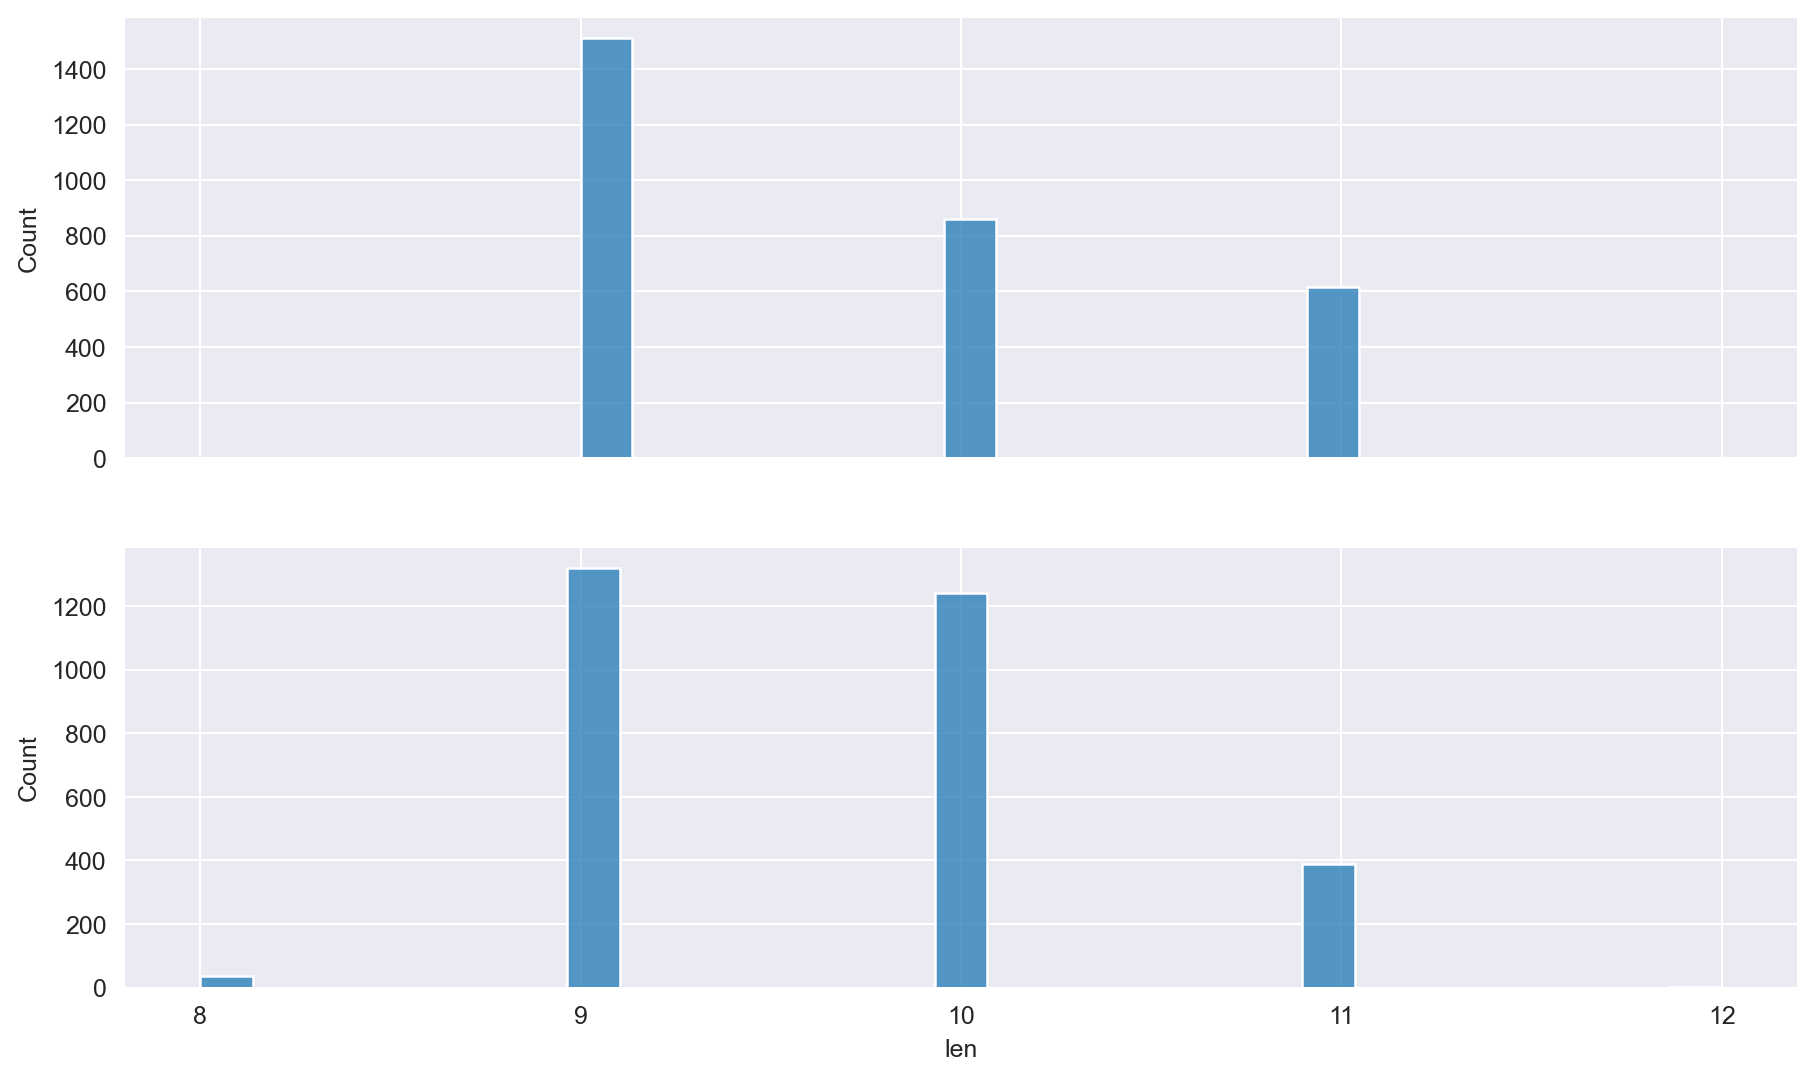

In [51]:
from src.utils import 
f,a = plt.subplots(2, 1, figsize=(12,7), sharex=True)
a = a.ravel()
sns.histplot(cedar, x='len', ax=a[0])
sns.histplot(prime, x='len', ax=a[1])
a[1].set_xticks([8, 9, 10, 11, 12])

In [44]:
cedar['Peptide'].apply(len).describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99])

count    2988.000000
mean        9.701807
std         0.790662
min         9.000000
10%         9.000000
25%         9.000000
50%         9.000000
75%        10.000000
80%        11.000000
90%        11.000000
95%        11.000000
99%        11.000000
max        12.000000
Name: Peptide, dtype: float64

In [43]:
prime['Peptide'].apply(len).describe()

count    2992.000000
mean        9.664439
std         0.714537
min         8.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        12.000000
Name: Peptide, dtype: float64

In [40]:
cedar['len'].describe()

count    2988.000000
mean        9.701807
std         0.790662
min         9.000000
25%         9.000000
50%         9.000000
75%        10.000000
max        12.000000
Name: len, dtype: float64

In [35]:
v.mean(axis=0)[w], c.mean(axis=0)[w]

(0.006958562513318169, 0.013640526597994496)

In [13]:
cedar.HLA.unique(), len(cedar.HLA.unique())

(array(['HLA-B0702', 'HLA-A0201', 'HLA-A1101', 'HLA-C1203', 'HLA-A0206',
        'HLA-B0801', 'HLA-B4002', 'HLA-B4403', 'HLA-B4408', 'HLA-B4402',
        'HLA-B4001', 'HLA-A6801', 'HLA-A2402', 'HLA-B3501', 'HLA-B1501',
        'HLA-A0301', 'HLA-A1102', 'HLA-A0202', 'HLA-B2705', 'HLA-C0702',
        'HLA-B5701', 'HLA-A3001', 'HLA-A6802', 'HLA-A0205', 'HLA-A0203',
        'HLA-A0101', 'HLA-C1403', 'HLA-B5101', 'HLA-A2501', 'HLA-B1801',
        'HLA-C0602', 'HLA-C0102', 'HLA-A2601', 'HLA-A3301', 'HLA-B3801',
        'HLA-A3101', 'HLA-A2902', 'HLA-C0303', 'HLA-C0501', 'HLA-A0224',
        'HLA-B5401', 'HLA-B3901', 'HLA-C0304', 'HLA-B5601', 'HLA-C0802',
        'HLA-A0211', 'HLA-C1502', 'HLA-B3701', 'HLA-A0210', 'HLA-B4102',
        'HLA-C1202', 'HLA-C0401', 'HLA-B1302', 'HLA-C0701', 'HLA-A3002',
        'HLA-B3503', 'HLA-B5201', 'HLA-B3906', 'HLA-B4901', 'HLA-A6901',
        'HLA-C1402', 'HLA-A0302', 'HLA-B3704'], dtype=object),
 63)

In [14]:
prime.HLA.unique(), len(prime.HLA.unique())

(array(['HLA-B0702', 'HLA-A1101', 'HLA-A0301', 'HLA-B1501', 'HLA-A6801',
        'HLA-C0303', 'HLA-A3101', 'HLA-B3501', 'HLA-B4403', 'HLA-A2402',
        'HLA-A3301', 'HLA-C0602', 'HLA-A0201', 'HLA-A0206', 'HLA-A0101',
        'HLA-A0211', 'HLA-C1502', 'HLA-A6901', 'HLA-A6802', 'HLA-C0702',
        'HLA-B5101', 'HLA-A2601', 'HLA-C1403', 'HLA-B1801', 'HLA-B0801',
        'HLA-C0701', 'HLA-B2705', 'HLA-C0102', 'HLA-A2501', 'HLA-B4402',
        'HLA-B3801', 'HLA-C1203', 'HLA-B5601', 'HLA-C0304', 'HLA-B3901',
        'HLA-C0802', 'HLA-A3001', 'HLA-B3701', 'HLA-C0501', 'HLA-B4102',
        'HLA-A2902', 'HLA-C0401', 'HLA-B3503', 'HLA-B4001', 'HLA-B3906',
        'HLA-B4901', 'HLA-B2702', 'HLA-B5701'], dtype=object),
 48)

In [17]:
prime.HLA.unique(), len(prime.HLA.unique())

(array(['HLA-B0702', 'HLA-A1101', 'HLA-A0301', 'HLA-B1501', 'HLA-A6801',
        'HLA-C0303', 'HLA-A3101', 'HLA-B3501', 'HLA-B4403', 'HLA-A2402',
        'HLA-A3301', 'HLA-C0602', 'HLA-A0201', 'HLA-A0206', 'HLA-A0101',
        'HLA-A0211', 'HLA-C1502', 'HLA-A6901', 'HLA-C0702', 'HLA-B5101',
        'HLA-A2601', 'HLA-C1403', 'HLA-B1801', 'HLA-B0801', 'HLA-C0701',
        'HLA-B2705', 'HLA-A2501', 'HLA-B4402', 'HLA-B3801', 'HLA-B3901',
        'HLA-C0802', 'HLA-C0501', 'HLA-A3001', 'HLA-C0401', 'HLA-B4001',
        'HLA-C0304', 'HLA-B2702', 'HLA-A6802'], dtype=object),
 38)

In [21]:
cp_common = [x for x in prime.HLA.unique() if x in cedar.HLA.unique()]
cpf_common = [x for x in prime_filt.HLA.unique() if x in cedar.HLA.unique()]

In [22]:
len(cp_common), len(cpf

(47, 37)

In [9]:
df.Peptide.apply(len).describe()

count    754.000000
mean      20.018568
std        0.161911
min       20.000000
25%       20.000000
50%       20.000000
75%       20.000000
max       22.000000
Name: Peptide, dtype: float64

# Recheck how to do the results processing because I forgot xd

Here using a few reference bootstrapped DF

In [640]:
benchmark = pd.read_csv('../../benchmark/NEPDB_scored_withmodels_filtered_NODUPS.csv').set_index('Peptide')
new_preds = pd.read_csv('/Users/riwa/Downloads/ICERFIRE_predictions.csv').set_index('Peptide')
new_nepdb['Axelf'] = benchmark.loc[new_nepdb.index, 'Axelf']
new_nepdb['HLAthenaE_rank'] = 1-benchmark.loc[new_nepdb.index, 'HLAthenaE_rank']
new_nepdb['NNAlign_score_new'] = benchmark.loc[new_nepdb.index, 'NNAlign_score_new']
new_nepdb['EL_rank_exp'] = 1-benchmark.loc[new_nepdb.index, 'EL_rank_exp']
new_nepdb['mhcflurry_presentation_percentile'] = 1- benchmark.loc[new_nepdb.index, 'mhcflurry_presentation_percentile']
new_nepdb['PRIME_score'] = benchmark.loc[new_nepdb.index, 'PRIME_score']
new_nepdb['Base Model'] = benchmark.loc[new_nepdb.index, 'Base Model']
new_nepdb['IEDB_score'] = benchmark.loc[new_nepdb.index, 'IEDB_score']
new_nepdb['prediction'] = new_preds.loc[new_nepdb.index, 'prediction']
new_nepdb['Harmonic Model'] = benchmark.loc[new_nepdb.index, 'Harmonic Model']

In [643]:
print('Removed PRIME overlap from NEPDB\n')
for c in ['Axelf', 'HLAthenaE_rank', 'NNAlign_score_new', 'EL_rank_exp', 'mhcflurry_presentation_percentile', 'PRIME_score', 'Base Model', 'IEDB_score', 'Harmonic Model']:
    print(c.replace('Harmonic Model','ICERFIRE'), round(roc_auc_score(new_nepdb['agg_label'], new_nepdb[c]), 4))

Removed PRIME overlap from NEPDB

Axelf 0.7704
HLAthenaE_rank 0.6672
NNAlign_score_new 0.2943
EL_rank_exp 0.678
mhcflurry_presentation_percentile 0.6911
PRIME_score 0.379
Base Model 0.4638
IEDB_score 0.4237
ICERFIRE 0.6271


In [644]:
print('Using the full NEPDB dataset (with the PRIME overlap)\n')
for c in ['Axelf', 'HLAthenaE_rank', 'NNAlign_score_new', 'EL_rank_exp', 'mhcflurry_presentation_percentile', 'PRIME_score', 'Base Model', 'IEDB_score', 'Harmonic Model']:
    x = -1 if 'perc' in c or 'rank' in c else 1
    print(c.replace('Harmonic Model','ICERFIRE'), round(roc_auc_score(benchmark['agg_label'], x*benchmark[c]), 4))

Using the full NEPDB dataset (with the PRIME overlap)

Axelf 0.7765
HLAthenaE_rank 0.7302
NNAlign_score_new 0.4452
EL_rank_exp 0.7213
mhcflurry_presentation_percentile 0.669
PRIME_score 0.5558
Base Model 0.7351
IEDB_score 0.479
ICERFIRE 0.8055


In [577]:
from sklearn.metrics import roc_auc_score
mg=pd.merge(new_preds, new_nepdb, left_on=['Peptide','wild_type', 'icore_mut', 'icore_wt_aligned', 'HLA'], right_on=['Peptide','wild_type', 'icore_mut','icore_wt_aligned', 'HLA'], how ='inner')
new_nepdb = new_nepdb.set_index('Peptide').drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

roc_auc_score(mg['agg_label'],mg['prediction'])

0.6363636363636364

In [796]:
cedar.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [ ]:
cedar.query(

# icore plot

In [685]:
cedar_9mers = pipeline_mutation_scores(cedar.drop(columns=['Unnamed: 0.1', 'Unnamed: 0']), 
                         'icore_mut', 'icore_wt_aligned', ics_kl, .2, 'icore_').query('icore_len_mut==9')

In [713]:
def find_difference_location(peptide, wild_type, icore_mut, mutation_position):
    if mutation_position != "-1":
        return mutation_position
        
    for i in range(len(peptide)):
        if peptide[i] != wild_type[i]:
            if i < 9:
                return "right"
            else:
                return "left"
    
    return "not found"

cedar_9mers['mut_position'] = cedar_9mers.apply(lambda x: find_difference_location(x['Peptide'], x['wild_type'], x['icore_mut'], x['icore_mutation_position']), axis=1)
cedar_9mers['n_muts'] = cedar_9mers['mut_position'].apply(lambda x: x.count(',')+1)
cedar_9mers.groupby(['n_muts']).count()

,Peptide,HLA,EL_rank_mut,agg_label,fold,EL_rank_wt,EL_rank_wt_aligned,Total_Gene_TPM,Total_Peptide_TPM,Total_Scaled_Peptide_TPM,...,trueHLA_EL_rank,wild_type,foreignness_score,ratio_rank,in_cedar,db,in_prime,in_nepdb,mut_outside_pos,mut_position
n_muts,,,,,,,,,,,,,,,,,,,,,
1,2091,2091,2091,2091,2091,2091,2091,2091,2091,2091,...,2091,2091,2091,2091,2091,2091,2091,2091,2091,2091
2,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
3,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [714]:
cedar_9mers.query('n_muts==3')[['Peptide','wild_type','icore_mutation_position', 'icore_mut','icore_wt_aligned',
                                                     'icore_len_mut','len','icore_len_wt']]



,Peptide,wild_type,icore_mutation_position,icore_mut,icore_wt_aligned,icore_len_mut,len,icore_len_wt
605,FRYYRVSILL,FRIYAVSTLL,"2,4,7",FRYYRVSIL,FRIYAVSTL,9,10,9
855,HQFHVHPLL,HRFHVHPKS,"1,7,8",HQFHVHPLL,HRFHVHPKS,9,9,9
1017,ISIQRAQPL,LKLQRAQPL,"0,1,2",ISIQRAQPL,LKLQRAQPL,9,9,9
2089,RVALLSWTK,EGVLLSWTK,"0,1,2",RVALLSWTK,EGVLLSWTK,9,9,9
2118,RYYRVSILL,NPRRVSILL,"0,1,2",RYYRVSILL,NPRRVSILL,9,9,9


In [751]:
df_pos = cedar_9mers.query('agg_label==1').groupby(['mut_position']).agg(count=('Peptide','count'))
df_neg = cedar_9mers.query('agg_label==0').groupby(['mut_position']).agg(count=('Peptide','count'))
# Create a new DataFrame to store the updated counts
new_df_pos = pd.DataFrame(columns=['count'])
new_df_neg = pd.DataFrame(columns=['count'])
df_pos

,count
mut_position,
0,56
"0,1,2",1
"0,6",1
"0,7",1
1,50
2,65
"2,4",1
"2,4,7",1
"2,6",2


In [755]:
df_pos = cedar_9mers.query('agg_label==1').groupby(['mut_position']).agg(count=('Peptide','count'))
df_neg = cedar_9mers.query('agg_label==0').groupby(['mut_position']).agg(count=('Peptide','count'))
# Create a new DataFrame to store the updated counts
new_df_pos = pd.DataFrame(columns=['count'])
new_df_neg = pd.DataFrame(columns=['count'])
# Iterate through the original DataFrame
for index, row in df_pos.iterrows():
    indices = index.split(',')
    count = row['count']
    num_indices = len(indices)

    # Distribute the count to individual indices
    count_per_index = count // num_indices

    for idx in indices:
        if idx in new_df_pos.index:
            new_df_pos.loc[idx, 'count'] += count_per_index
        else:
            new_df_pos.loc[idx] = [count_per_index]

for index, row in df_neg.iterrows():
    indices = index.split(',')
    count = row['count']
    num_indices = len(indices)

    # Distribute the count to individual indices
    count_per_index = count // num_indices

    for idx in indices:
        if idx in new_df_neg.index:
            new_df_neg.loc[idx, 'count'] += count_per_index
        else:
            new_df_neg.loc[idx] = [count_per_index]

In [756]:
new_df_pos['percent'] = new_df_pos['count'] / len(cedar_9mers.query('agg_label==1'))
new_df_pos.reset_index(inplace=True)
new_df_neg['percent'] = new_df_neg['count'] / len(cedar_9mers.query('agg_label==0'))
new_df_neg.reset_index(inplace=True)
def get_pos(i):
    if i == 'left' : return i
    if i == 'right' : return i
    else: return str(int(i)+1)
        
new_df_pos['position'] = new_df_pos['index'].apply(get_pos)
new_df_neg['position'] = new_df_neg['index'].apply(get_pos)
order = ['left'] + [str(i+1) for i in range(9)] + ['right']

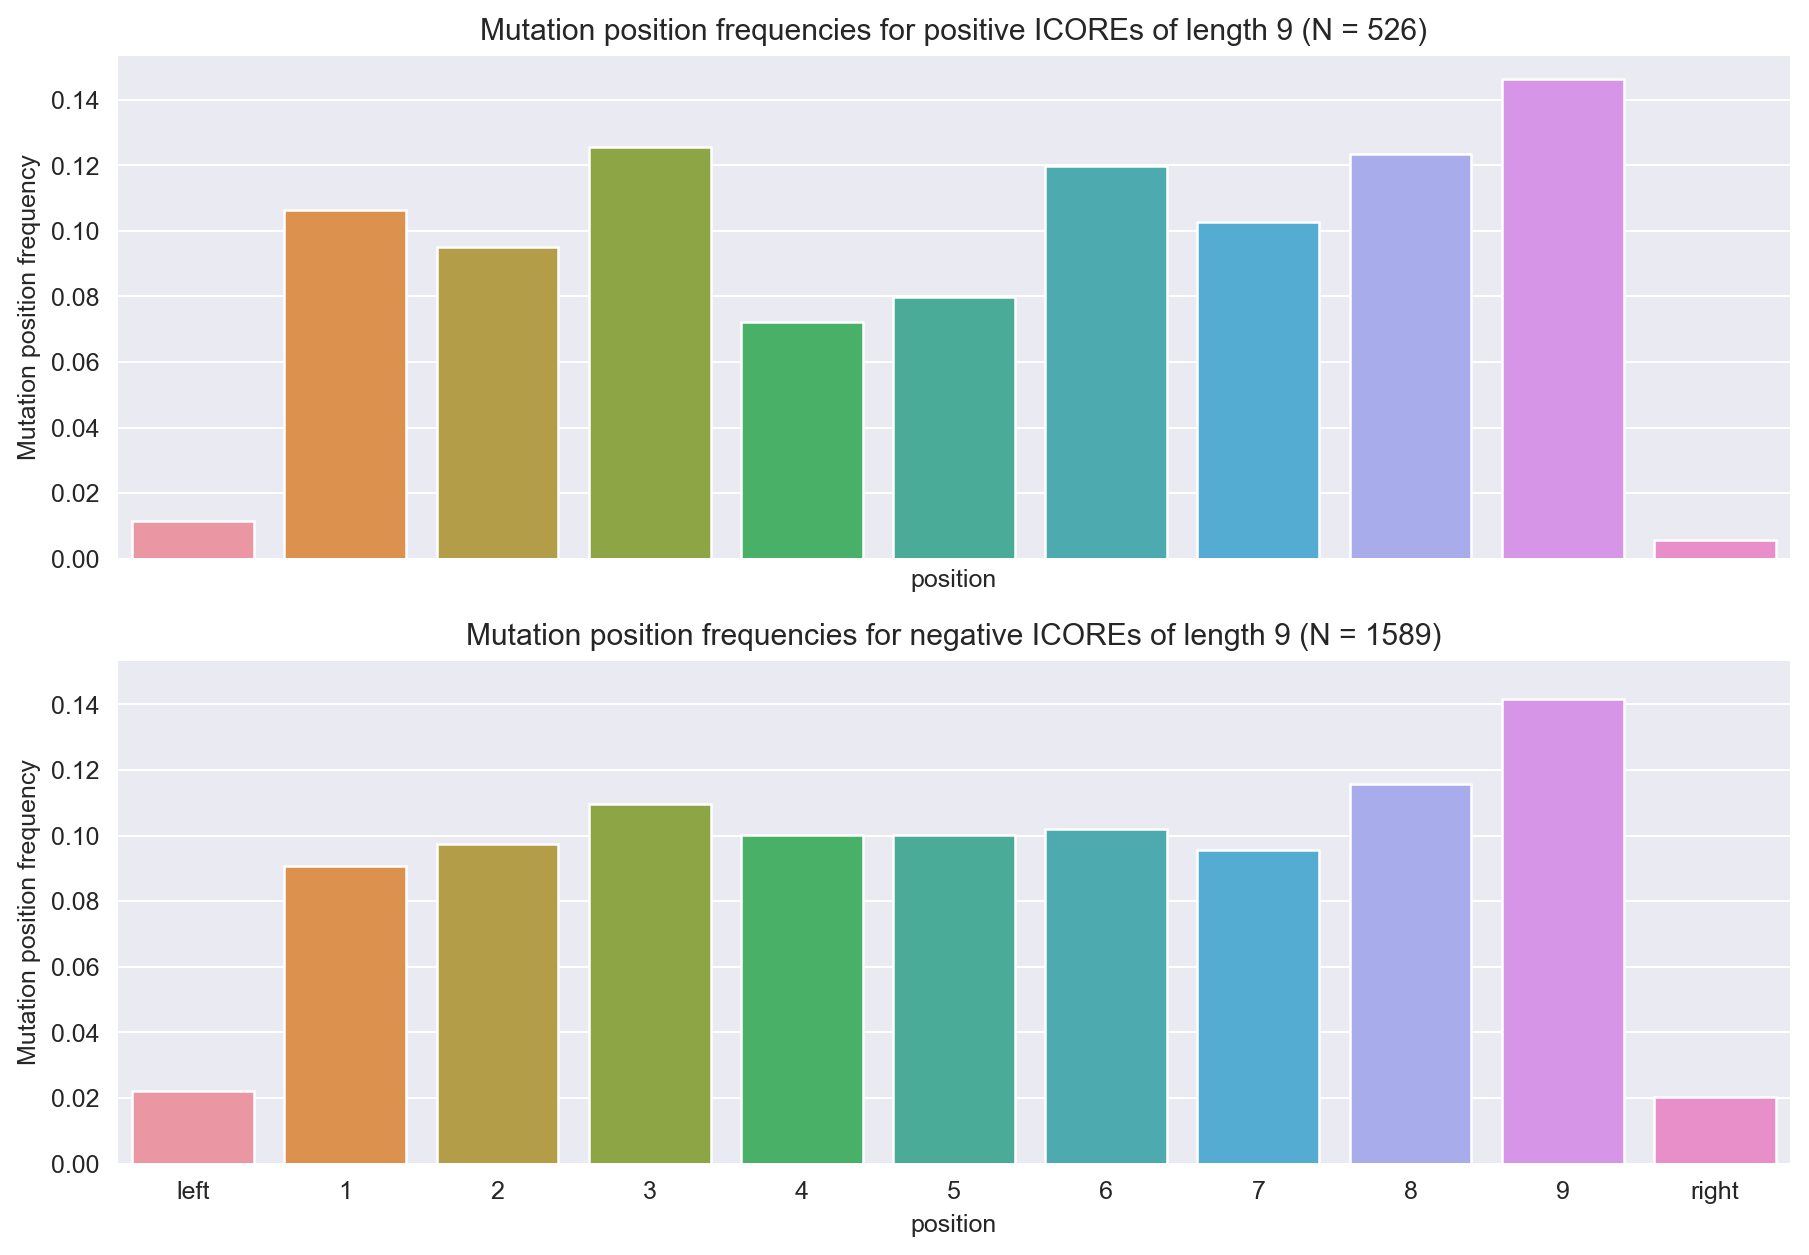

In [759]:
sns.set_palette('icefire', 1)
f,a = plt.subplots(2,1, figsize=(12,8), sharey=True, sharex=True)
a = a.ravel()
sns.barplot(data=new_df_pos, x='position', y='percent', order=order, ax=a[0])
a[0].set_ylabel('Mutation position frequency')
a[0].set_title(f'Mutation position frequencies for positive ICOREs of length 9 (N = {len(cedar_9mers.query("agg_label==1"))})')

sns.barplot(data=new_df_neg, x='position', y='percent', order=order, ax=a[1])
a[1].set_ylabel('Mutation position frequency')
a[1].set_title(f'Mutation position frequencies for negative ICOREs of length 9 (N = {len(cedar_9mers.query("agg_label==0"))})')
f.savefig('../../../writing/230131_cedar_paper_1/mut_pos.png', dpi=300, bbox_inches='tight')

## icore stats

In [804]:
cedar['mut_position'] = cedar.apply(lambda x: find_difference_location(x['Peptide'], x['wild_type'], x['icore_mut'], x['icore_mutation_position']), axis=1)
cpos = cedar.query('agg_label==1')
cneg = cedar.query('agg_label==0')
same_pos = cpos.query('Peptide==icore_mut')
diff_pos = cpos.query('Peptide!=icore_mut')
same_neg = cneg.query('Peptide==icore_mut')
diff_neg = cneg.query('Peptide!=icore_mut')

In [896]:
len(cpos), len(cneg), len(same_pos), len(diff_pos), len(same_neg), len(diff_neg)

(623, 2365, 460, 163, 1684, 681)

In [812]:
print('pos', 'same', round((len(same_pos) / len(cpos))*100, 1), 'diff', round((len(diff_pos) / len(cpos))*100, 1))
print('neg', 'same', round((len(same_neg) / len(cneg))*100, 1), 'diff', round((len(diff_neg) / len(cneg))*100, 1))

pos same 73.8 diff 26.2
neg same 71.2 diff 28.8


In [833]:
def find_truncation_location(row):
    peptide = row['Peptide']
    icore_mut = row['icore_mut']

    if peptide.startswith(icore_mut):
        return "N-term"
    elif peptide.endswith(icore_mut):
        return "C-term"
    else:
        return "Both"

diff_pos['trunc_loc'] = diff_pos.apply(find_truncation_location, axis=1)
diff_neg['trunc_loc'] = diff_neg.apply(find_truncation_location, axis=1)

In [841]:
pos_trunc = diff_pos.groupby(['trunc_loc']).agg(count=('Peptide', 'count'))
pos_trunc['prop'] = pos_trunc['count'] / len(diff_pos)*100
neg_trunc = diff_neg.groupby(['trunc_loc']).agg(count=('Peptide', 'count'))
neg_trunc['prop'] = neg_trunc['count'] / len(diff_neg)*100

In [842]:
display(pos_trunc)
display(neg_trunc)

,count,prop
trunc_loc,,
Both,4,2.453988
C-term,89,54.601227
N-term,70,42.944785


,count,prop
trunc_loc,,
Both,13,1.908957
C-term,364,53.450808
N-term,304,44.640235


In [843]:
len(diff_neg)

681

In [822]:
pos_positions = diff_pos.groupby(['mut_position']).agg(count=('Peptide','count'))
pos_positions['prop'] = pos_positions['count'] / len(diff_pos)
print(len(diff_pos))
pos_positions

163


,count,prop
mut_position,,
0,15,0.092025
"0,6,7",1,0.006135
"0,7",1,0.006135
1,17,0.104294
2,20,0.122699
"2,4",1,0.006135
"2,4,7",1,0.006135
3,12,0.073620
4,14,0.085890


In [821]:
neg_positions = diff_neg.groupby(['mut_position']).agg(count=('Peptide','count'))
neg_positions['prop'] = neg_positions['count'] / len(diff_neg)
print(len(diff_neg))
neg_positions

681


,count,prop
mut_position,,
0,58,0.085169
1,61,0.089574
"1,2",1,0.001468
2,62,0.091043
3,62,0.091043
4,68,0.099853
5,65,0.095448
6,54,0.079295
7,74,0.108664


In [802]:
len(same)/len(cedar), len(diff)/len(cedar)

(0.7175368139223561, 0.2824631860776439)

# Quickly redo GB agg with filtered PRIME results

In [773]:
gb = pd.read_csv('../output/redo_primefilt_gb/dunno_gb_results.csv')
gb.head()

,weight,key,mean_auc_CEDAR,mean_auc01_CEDAR,pval_icore_CEDAR,pval_pep_CEDAR,mean_auc_PRIME,mean_auc01_PRIME,pval_icore_PRIME,pval_pep_PRIME
0,Inverted-KL-Mask,hydrophobicity-isoelectric_point-dissimilarity...,0.713055,0.583921,0.4501,0.0075,NaN,NaN,NaN,NaN
1,KL-Mask,hydrophobicity-dissimilarity_score-ratio_rank-...,0.711064,0.585145,0.5439,0.0051,0.657844,0.535810,100.0,100.0
2,KL,isoelectric_point-dissimilarity_score-blsm_mut...,0.713061,0.578685,0.4243,0.0013,0.656800,0.563223,100.0,100.0
3,None,isoelectric_point-dissimilarity_score-ratio_ra...,0.711854,0.578831,0.4994,0.0020,0.658456,0.564152,100.0,100.0
4,None,boman-hydrophobicity-isoelectric_point-blsm_mu...,0.730724,0.579913,0.0032,0.0000,0.637894,0.524967,100.0,100.0


In [847]:
prime.query('not in_cedar').groupby(['agg_label']).count()

,Unnamed: 0.1,Unnamed: 0,HLA,fold,Peptide,wild_type,icore_mut,core_mut,len,EL_rank_mut,...,EL_rank_wt_aligned,Total_Peptide_TPM,Total_Scaled_Peptide_TPM,Total_Gene_TPM,foreignness_score,ratio_rank,in_prime,db,in_cedar,in_nepdb
agg_label,,,,,,,,,,,,,,,,,,,,,
0,2550,2550,2550,2550,2550,2550,2550,2550,2550,2550,...,2550,2550,2550,2550,2550,2550,2550,2550,2550,2550
1,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43


In [848]:
prime.query('not in_cedar and not in_nepdb').groupby(['agg_label']).count()

,Unnamed: 0.1,Unnamed: 0,HLA,fold,Peptide,wild_type,icore_mut,core_mut,len,EL_rank_mut,...,EL_rank_wt_aligned,Total_Peptide_TPM,Total_Scaled_Peptide_TPM,Total_Gene_TPM,foreignness_score,ratio_rank,in_prime,db,in_cedar,in_nepdb
agg_label,,,,,,,,,,,,,,,,,,,,,
0,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395,...,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395
1,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36


In [780]:
rest = gb.query('not weight.str.contains("Inv")')
inv = gb.query('weight.str.contains("Inv") and not weight.str.contains("Inverted")')
inverted = gb.query('weight.str.contains("Inverted")')
inverted['weight'] = inverted['weight'].apply(lambda x: x.replace('Inverted', 'Inv'))

In [789]:
gb = pd.concat([rest.set_index(['weight','key']), pd.merge(inverted.set_index(['weight', 'key'])[['mean_auc_CEDAR', 'mean_auc01_CEDAR', 'pval_icore_CEDAR', 'pval_pep_CEDAR']],
        inv.set_index(['weight', 'key'])[['mean_auc_PRIME', 'mean_auc01_PRIME', 'pval_icore_PRIME', 'pval_pep_PRIME']],
        left_index=True, right_index=True)], axis=0)

In [792]:
from scipy.stats import hmean
gb['harmonic'] = gb.apply(lambda x: hmean([x['mean_auc_CEDAR'], x['mean_auc_PRIME']]), axis=1)


In [793]:
gb.sort_values('harmonic', ascending=False).head()

mean_auc_CEDAR  \
weight  key                                                                  
KL-Mask blsm_mut_score-foreignness_score-Total_Gene_TPM           0.719960   
        hydrophobicity-dissimilarity_score-blsm_mut_sco...        0.734622   
        blsm_mut_score-Total_Gene_TPM                             0.719122   
        isoelectric_point-dissimilarity_score-blsm_mut_...        0.719588   
        hydrophobicity-blsm_mut_score-ratio_rank_square...        0.734796   

                                                            mean_auc01_CEDAR  \
weight  key                                                                    
KL-Mask blsm_mut_score-foreignness_score-Total_Gene_TPM             0.569191   
        hydrophobicity-dissimilarity_score-blsm_mut_sco...          0.589076   
        blsm_mut_score-Total_Gene_TPM                               0.568360   
        isoelectric_point-dissimilarity_score-blsm_mut_...          0.571275   
        hydrophobicity-blsm_mut_score-ratio_rank_square...          0.587545   

                                                            pval_icore_CEDAR  \
weight  key                                                                    
KL-Mask blsm_mut_score-foreignness_score-Total_Gene_TPM               0.1217   
        hydrophobicity-dissimilarity_score-blsm_mut_sco...            0.0007   
        blsm_mut_score-Total_Gene_TPM                                 0.1442   
        isoelectric_point-dissimilarity_score-blsm_mut_...            0.1353   
        hydrophobicity-blsm_mut_score-ratio_rank_square...            0.0010   

                                                            pval_pep_CEDAR  \
weight  key                                                                  
KL-Mask blsm_mut_score-foreignness_score-Total_Gene_TPM             0.0003   
        hydrophobicity-dissimilarity_score-blsm_mut_sco...          0.0000   
        blsm_mut_score-Total_Gene_TPM                               0.0002   
        isoelectric_point-dissimilarity_score-blsm_mut_...          0.0002   
        hydrophobicity-blsm_mut_score-ratio_rank_square...          0.0000   

                                                            mean_auc_PRIME  \
weight  key                                                                  
KL-Mask blsm_mut_score-foreignness_score-Total_Gene_TPM           0.677865   
        hydrophobicity-dissimilarity_score-blsm_mut_sco...        0.665190   
        blsm_mut_score-Total_Gene_TPM                             0.678038   
        isoelectric_point-dissimilarity_score-blsm_mut_...        0.677359   
        hydrophobicity-blsm_mut_score-ratio_rank_square...        0.664362   

                                                            mean_auc01_PRIME  \
weight  key                                                                    
KL-Mask blsm_mut_score-foreignness_score-Total_Gene_TPM             0.563857   
        hydrophobicity-dissimilarity_score-blsm_mut_sco...          0.539623   
        blsm_mut_score-Total_Gene_TPM                               0.565132   
        isoelectric_point-dissimilarity_score-blsm_mut_...          0.552538   
        hydrophobicity-blsm_mut_score-ratio_rank_square...          0.541498   

                                                            pval_icore_PRIME  \
weight  key                                                                    
KL-Mask blsm_mut_score-foreignness_score-Total_Gene_TPM                100.0   
        hydrophobicity-dissimilarity_score-blsm_mut_sco...             100.0   
        blsm_mut_score-Total_Gene_TPM                                  100.0   
        isoelectric_point-dissimilarity_score-blsm_mut_...             100.0   
        hydrophobicity-blsm_mut_score-ratio_rank_square...             100.0   

                                                            pval_pep_PRIME  \
weight  key                                                                  
KL-Mask blsm_mut_sc

In [857]:
gb_merged = pd.read_csv('../output/231018_redo_merged/cedar_prime_gb_results.csv',  index_col=[0,1])
gb_merged.sort_values('mean_auc_KCV', ascending=False).head(3)

mean_auc_KCV  \
weight      key                                                                
KL          boman-blsm_mut_score-Total_Gene_TPM                     0.734019   
            boman-blsm_mut_score-foreignness_score-Total_Ge...      0.733436   
Inverted-KL boman-blsm_mut_score-foreignness_score-Total_Ge...      0.733277   

                                                                mean_auc01_KCV  \
weight      key                                                                  
KL          boman-blsm_mut_score-Total_Gene_TPM                       0.584586   
            boman-blsm_mut_score-foreignness_score-Total_Ge...        0.584568   
Inverted-KL boman-blsm_mut_score-foreignness_score-Total_Ge...        0.582199   

                                                                pval_icore_KCV  \
weight      key                                                                  
KL          boman-blsm_mut_score-Total_Gene_TPM                         0.0001   
            boman-blsm_mut_score-foreignness_score-Total_Ge...          0.0002   
Inverted-KL boman-blsm_mut_score-foreignness_score-Total_Ge...          0.0043   

                                                                pval_pep_KCV  \
weight      key                                                                
KL          boman-blsm_mut_score-Total_Gene_TPM                          0.0   
            boman-blsm_mut_score-foreignness_score-Total_Ge...           0.0   
Inverted-KL boman-blsm_mut_score-foreignness_score-Total_Ge...           0.0   

                                                                mean_auc_CEDAR  \
weight      key                                                                  
KL          boman-blsm_mut_score-Total_Gene_TPM                       0.734112   
            boman-blsm_mut_score-foreignness_score-Total_Ge...        0.733530   
Inverted-KL boman-blsm_mut_score-foreignness_score-Total_Ge...        0.736040   

                                                                mean_auc01_CEDAR  \
weight      key                                                                    
KL          boman-blsm_mut_score-Total_Gene_TPM                         0.581908   
            boman-blsm_mut_score-foreignness_score-Total_Ge...          0.580456   
Inverted-KL boman-blsm_mut_score-foreignness_score-Total_Ge...          0.579534   

                                                                pval_icore_CEDAR  \
weight      key                                                                    
KL          boman-blsm_mut_score-Total_Gene_TPM                           0.0000   
            boman-blsm_mut_score-foreignness_score-Total_Ge...            0.0000   
Inverted-KL boman-blsm_mut_score-foreignness_score-Total_Ge...            0.0016   

                                                                pval_pep_CEDAR  \
weight      key                                                                  
KL          boman-blsm_mut_score-Total_Gene_TPM                            0.0   
            boman-blsm_mut_score-foreignness_score-Total_Ge...             0.0   
Inverted-KL boman-blsm_mut_score-foreignness_score-Total_Ge...             0.0   

                                                                mean_auc_PRIME  \
weight      key                                                                  
KL          boman-blsm_mut_score-Total_Gene_TPM                       0.717145   
            boman-blsm_mut_score-foreignness_score-Total_Ge...        0.715569   
Inverted-KL boman-blsm_mut_score-foreignness_score-Total_Ge...        0.702502   

                                                                mean_auc01_PRIME  \
weight      key                                                                    
KL          boman-blsm_mut_score-Total_Gene_TPM                         0.593396   
            boman-blsm_mut_score-foreignness_score-Total_Ge...          0.595302   
Inverted-KL boman-blsm_mut_sc

In [854]:
gb_merged.sort_values('mean_auc_CEDAR', ascending=False).head(3)

,,mean_auc_KCV,mean_auc01_KCV,pval_icore_KCV,pval_pep_KCV,mean_auc_CEDAR,mean_auc01_CEDAR,pval_icore_CEDAR,pval_pep_CEDAR,mean_auc_PRIME,mean_auc01_PRIME,pval_icore_PRIME,pval_pep_PRIME,mean_auc_NEPDB,mean_auc01_NEPDB,pval_icore_NEPDB,pval_pep_NEPDB,mean_auc_NEW_NEPDB,mean_auc01_NEW_NEPDB,pval_icore_NEW_NEPDB,pval_pep_NEW_NEPDB
weight,key,,,,,,,,,,,,,,,,,,,,
Inverted-KL,boman-blsm_mut_score-foreignness_score-Total_Gene_TPM,0.733277,0.582199,0.0043,0.0,0.736040,0.579534,0.0016,0.0,0.702502,0.598546,0.6320,0.2381,0.761324,0.628563,0.5211,0.0105,0.596386,0.557122,0.1116,0.0656
KL-Mask,aliphatic_index-boman-isoelectric_point-blsm_mut_score-Total_Gene_TPM,0.731269,0.586719,0.0005,0.0,0.735514,0.589957,0.0001,0.0,0.711214,0.589287,0.3830,0.0814,0.769580,0.631286,0.3886,0.0032,0.598215,0.550060,0.0201,0.0250
Inverted-KL,boman-hydrophobicity-isoelectric_point-blsm_mut_score-foreignness_score-Total_Gene_TPM,0.731875,0.581820,0.0058,0.0,0.735333,0.580865,0.0014,0.0,0.702274,0.592556,0.6416,0.2365,0.754648,0.628817,0.5764,0.0127,0.607180,0.567250,0.0903,0.0538


In [855]:
gb_merged.sort_values('mean_auc_PRIME', ascending=False).head(3)

mean_auc_KCV  \
weight  key                                                                
KL-Mask blsm_mut_score-foreignness_score-Total_Gene_TPM         0.724178   
        hydrophobicity-blsm_mut_score-ratio_rank-EL_ran...      0.715862   
        blsm_mut_score-Total_Gene_TPM                           0.723555   

                                                            mean_auc01_KCV  \
weight  key                                                                  
KL-Mask blsm_mut_score-foreignness_score-Total_Gene_TPM           0.578697   
        hydrophobicity-blsm_mut_score-ratio_rank-EL_ran...        0.580547   
        blsm_mut_score-Total_Gene_TPM                             0.578997   

                                                            pval_icore_KCV  \
weight  key                                                                  
KL-Mask blsm_mut_score-foreignness_score-Total_Gene_TPM             0.0313   
        hydrophobicity-blsm_mut_score-ratio_rank-EL_ran...          0.3043   
        blsm_mut_score-Total_Gene_TPM                               0.0371   

                                                            pval_pep_KCV  \
weight  key                                                                
KL-Mask blsm_mut_score-foreignness_score-Total_Gene_TPM           0.0003   
        hydrophobicity-blsm_mut_score-ratio_rank-EL_ran...        0.0035   
        blsm_mut_score-Total_Gene_TPM                             0.0003   

                                                            mean_auc_CEDAR  \
weight  key                                                                  
KL-Mask blsm_mut_score-foreignness_score-Total_Gene_TPM           0.719696   
        hydrophobicity-blsm_mut_score-ratio_rank-EL_ran...        0.716361   
        blsm_mut_score-Total_Gene_TPM                             0.718335   

                                                            mean_auc01_CEDAR  \
weight  key                                                                    
KL-Mask blsm_mut_score-foreignness_score-Total_Gene_TPM             0.570422   
        hydrophobicity-blsm_mut_score-ratio_rank-EL_ran...          0.583068   
        blsm_mut_score-Total_Gene_TPM                               0.571501   

                                                            pval_icore_CEDAR  \
weight  key                                                                    
KL-Mask blsm_mut_score-foreignness_score-Total_Gene_TPM               0.1146   
        hydrophobicity-blsm_mut_score-ratio_rank-EL_ran...            0.2239   
        blsm_mut_score-Total_Gene_TPM                                 0.1593   

                                                            pval_pep_CEDAR  \
weight  key                                                                  
KL-Mask blsm_mut_score-foreignness_score-Total_Gene_TPM             0.0001   
        hydrophobicity-blsm_mut_score-ratio_rank-EL_ran...          0.0002   
        blsm_mut_score-Total_Gene_TPM                               0.0003   

                                                            mean_auc_PRIME  \
weight  key                                                                  
KL-Mask blsm_mut_score-foreignness_score-Total_Gene_TPM           0.728164   
        hydrophobicity-blsm_mut_score-ratio_rank-EL_ran...        0.727536   
        blsm_mut_score-Total_Gene_TPM                             0.727394   

                                                            mean_auc01_PRIME  \
weight  key                                                                    
KL-Mask blsm_mut_score-foreignness_score-Total_Gene_TPM             0.614957   
        hydrophobicity-blsm_mut_score-ratio_rank-EL_ran...          0.605802   
        blsm_mut_score-Total_Gene_TPM                               0.612440   

                                                            pval_icore_PRIME  \
weight  key                                                 

In [856]:
gb_merged.sort_values('mean_auc_NEPDB',ascending=False).head(3)

,,mean_auc_KCV,mean_auc01_KCV,pval_icore_KCV,pval_pep_KCV,mean_auc_CEDAR,mean_auc01_CEDAR,pval_icore_CEDAR,pval_pep_CEDAR,mean_auc_PRIME,mean_auc01_PRIME,pval_icore_PRIME,pval_pep_PRIME,mean_auc_NEPDB,mean_auc01_NEPDB,pval_icore_NEPDB,pval_pep_NEPDB,mean_auc_NEW_NEPDB,mean_auc01_NEW_NEPDB,pval_icore_NEW_NEPDB,pval_pep_NEW_NEPDB
weight,key,,,,,,,,,,,,,,,,,,,,
KL-Mask,dissimilarity_score-Total_Gene_TPM,0.717376,0.575676,0.2331,0.0036,0.714612,0.565896,0.3367,0.0007,0.721690,0.609407,0.1128,0.0214,0.831482,0.688681,0.0000,0.0,0.678280,0.597666,0.0001,0.0003
KL,dissimilarity_score-EL_rank_wt_aligned-Total_Gene_TPM,0.722887,0.580887,0.0347,0.0005,0.717825,0.570505,0.1554,0.0001,0.717562,0.607455,0.1882,0.0375,0.829873,0.716082,0.0000,0.0,0.670126,0.641321,0.0001,0.0016
KL-Mask,dissimilarity_score-EL_rank_wt_aligned-Total_Gene_TPM,0.715681,0.574784,0.3349,0.0063,0.712645,0.564566,0.4546,0.0017,0.721288,0.606532,0.1151,0.0206,0.829551,0.678395,0.0002,0.0,0.681423,0.602231,0.0001,0.0007


## quickly re-train new consensus model and new best merged model

In [861]:
gb.sort_values('harmonic', ascending=False).head(1)

,,mean_auc_CEDAR,mean_auc01_CEDAR,pval_icore_CEDAR,pval_pep_CEDAR,mean_auc_PRIME,mean_auc01_PRIME,pval_icore_PRIME,pval_pep_PRIME,harmonic
weight,key,,,,,,,,,
KL-Mask,blsm_mut_score-foreignness_score-Total_Gene_TPM,0.71996,0.569191,0.1217,0.0003,0.677865,0.563857,100.0,100.0,0.698279


In [862]:
gb_merged = pd.read_csv('../output/231018_redo_merged/cedar_prime_gb_results.csv',  index_col=[0,1])
gb_merged.sort_values('mean_auc_KCV', ascending=False).head(1)

,,mean_auc_KCV,mean_auc01_KCV,pval_icore_KCV,pval_pep_KCV,mean_auc_CEDAR,mean_auc01_CEDAR,pval_icore_CEDAR,pval_pep_CEDAR,mean_auc_PRIME,mean_auc01_PRIME,pval_icore_PRIME,pval_pep_PRIME,mean_auc_NEPDB,mean_auc01_NEPDB,pval_icore_NEPDB,pval_pep_NEPDB,mean_auc_NEW_NEPDB,mean_auc01_NEW_NEPDB,pval_icore_NEW_NEPDB,pval_pep_NEW_NEPDB
weight,key,,,,,,,,,,,,,,,,,,,,
KL,boman-blsm_mut_score-Total_Gene_TPM,0.734019,0.584586,0.0001,0.0,0.734112,0.581908,0.0,0.0,0.717145,0.593396,0.2097,0.0426,0.7924,0.686171,0.1163,0.0006,0.616164,0.602602,0.0077,0.017


In [865]:
from src.sklearn_train_eval import nested_kcv_train_sklearn, evaluate_trained_models_sklearn
from sklearn.ensemble import RandomForestClassifier
from copy import deepcopy

encoding_kwargs = {'max_len': 12,
                   'encoding': 'onehot',
                   'blosum_matrix': None,
                   'mask': False,  # Using Shannon ICs, true if both mask and name is "shannon"
                   'add_rank': True,
                   'seq_col': 'icore_mut',
                   'rank_col': 'EL_rank_mut',
                   'hla_col': 'HLA',
                   'invert':False,
                   'add_aaprop': False,
                   'remove_pep': False,
                   'standardize': True}

cedar = pd.read_csv('../data/pepx/230418_cedar_aligned_pepx.csv')
cp_merged = pd.read_csv('../data/pepx/231018_cedar_prime_merged_fold.csv')
# New consensus model
new_consensus = RandomForestClassifier(n_jobs=1, min_samples_leaf=7, n_estimators=300, max_depth=8, ccp_alpha=9.945e-6)
new_kwargs = deepcopy(encoding_kwargs)
new_kwargs['mask'] = True
new_kwargs['mut_col'] = ['icore_blsm_mut_score', 'foreignness_score', 'Total_Gene_TPM']
new_consensus, _, _ = nested_kcv_train_sklearn(cedar, new_consensus, ics_dict = ics_kl, encoding_kwargs=new_kwargs, n_jobs=8)

# Merged model
merged_consensus = RandomForestClassifier(n_jobs=1, min_samples_leaf=7, n_estimators=300, max_depth=8, ccp_alpha=9.945e-6)
merged_kwargs = deepcopy(encoding_kwargs)
merged_kwargs['mask'] = False
merged_kwargs['mut_col'] = ['boman', 'icore_blsm_mut_score', 'Total_Gene_TPM']
merged_consensus, _, _ = nested_kcv_train_sklearn(cp_merged, merged_consensus, ics_dict = ics_kl, encoding_kwargs=merged_kwargs, n_jobs=8)


Train:Outer fold:   0%|          | 0/10 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Train:Outer fold:   0%|          | 0/10 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

In [875]:
# Merged model
new_merged = RandomForestClassifier(n_jobs=1, min_samples_leaf=7, n_estimators=300, max_depth=8, ccp_alpha=9.945e-6)
merged_kwargs = deepcopy(encoding_kwargs)
merged_kwargs['mask'] = False
merged_kwargs['mut_col'] = ['boman', 'icore_blsm_mut_score', 'Total_Gene_TPM']
new_merged, _, _ = nested_kcv_train_sklearn(cedar, new_merged, ics_dict = ics_kl, encoding_kwargs=merged_kwargs, n_jobs=8)


Train:Outer fold:   0%|          | 0/10 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

In [898]:
# Old consensus model trained on merged data
consensus_retrained = RandomForestClassifier(n_jobs=1, min_samples_leaf=7, n_estimators=300, max_depth=8, ccp_alpha=9.945e-6)
retrained_kwargs = deepcopy(encoding_kwargs)
retrained_kwargs['mask'] = True
retrained_kwargs['mut_col'] = ['icore_dissimilarity_score', 'icore_blsm_mut_score', 'Total_Gene_TPM']
consensus_retrained, _, _ = nested_kcv_train_sklearn(cp_merged, consensus_retrained, ics_dict = ics_kl, encoding_kwargs=retrained_kwargs, n_jobs=8)


Train:Outer fold:   0%|          | 0/10 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

In [899]:
_, retrained_nepdb_preds = evaluate_trained_models_sklearn(nepdb, consensus_retrained, ics_kl, cp_merged, retrained_kwargs, False, True, 10, kcv_eval=False)

Eval Folds:   0%|          | 0/10 [00:00<?, ?it/s]

In [876]:
_, new_nepdb_preds = evaluate_trained_models_sklearn(nepdb, new_consensus, ics_kl, cedar,
                                                     new_kwargs, False, True, 10, kcv_eval=False)

_, merged_nepdb_preds = evaluate_trained_models_sklearn(nepdb, merged_consensus, ics_kl, cp_merged, merged_kwargs, False, True, 10 , kcv_eval=False)

_, new_merged_nepdb_preds = evaluate_trained_models_sklearn(nepdb, new_merged, ics_kl, cedar, merged_kwargs, False, True, 10, kcv_eval=False)

Eval Folds:   0%|          | 0/10 [00:00<?, ?it/s]

Eval Folds:   0%|          | 0/10 [00:00<?, ?it/s]

Eval Folds:   0%|          | 0/10 [00:00<?, ?it/s]

In [877]:
from sklearn.metrics import roc_auc_score

print(f"NEW CONSENSUS: {roc_auc_score(new_nepdb_preds['agg_label'], new_nepdb_preds['mean_pred']):.2%}, {roc_auc_score(new_nepdb_preds['agg_label'], new_nepdb_preds['mean_pred'], max_fpr=0.1):.2%}")

print(f"MERGED TRAIN: {roc_auc_score(merged_nepdb_preds['agg_label'], merged_nepdb_preds['mean_pred']):.2%}, {roc_auc_score(merged_nepdb_preds['agg_label'], merged_nepdb_preds['mean_pred'], max_fpr=0.1):.2%}")
print(f"BEST MERGED TRAIN ON CEDAR: {roc_auc_score(new_merged_nepdb_preds['agg_label'], new_merged_nepdb_preds['mean_pred']):.2%}, {roc_auc_score(new_merged_nepdb_preds['agg_label'], new_merged_nepdb_preds['mean_pred'], max_fpr=0.1):.2%}")

NEW CONSENSUS: 76.75%, 61.30%
MERGED TRAIN: 79.27%, 68.61%
BEST MERGED TRAIN ON CEDAR: 75.39%, 58.60%


In [903]:
print(f"old consensus retrained on merged: {roc_auc_score(retrained_nepdb_preds['agg_label'], retrained_nepdb_preds['mean_pred']):.2%}, {roc_auc_score(retrained_nepdb_preds['agg_label'], retrained_nepdb_preds['mean_pred'], max_fpr=0.1):.2%}")

old consensus retrained on merged: 80.97%, 67.79%


In [895]:
for c in [x for x in merged_boot.columns if x != 'id']:
    print(c[:6], f'\tMERGED:\t{merged_boot[c].mean():.3f}>NEW:{new_boot[c].mean():.3f}', get_pval_wrapper(merged_boot, new_boot, column=c))

auc 	MERGED:	0.793>NEW:0.768 (0.17469999999999997, 'ns')
auc_01 	MERGED:	0.686>NEW:0.615 (0.01100000000000001, '*')
precis 	MERGED:	0.275>NEW:0.124 (0.0018000000000000238, '**')
accura 	MERGED:	0.840>NEW:0.470 (0.0, '****')
AP 	MERGED:	0.438>NEW:0.341 (0.005299999999999971, '**')


In [901]:
retrained_boot = bootstrap_eval(retrained_nepdb_preds['mean_pred'].values, retrained_nepdb_preds['agg_label'].values, n_jobs=10, auc01=True)

Sampling


Bootstrapping rounds:   0%|          | 0/10000 [00:00<?, ?it/s]

Making results DF and curves


In [895]:
for c in [x for x in merged_boot.columns if x != 'id']:
    print(c[:6], f'\tMERGED:\t{merged_boot[c].mean():.3f}>NEW:{new_boot[c].mean():.3f}', get_pval_wrapper(merged_boot, new_boot, column=c))

auc 	MERGED:	0.793>NEW:0.768 (0.17469999999999997, 'ns')
auc_01 	MERGED:	0.686>NEW:0.615 (0.01100000000000001, '*')
precis 	MERGED:	0.275>NEW:0.124 (0.0018000000000000238, '**')
accura 	MERGED:	0.840>NEW:0.470 (0.0, '****')
AP 	MERGED:	0.438>NEW:0.341 (0.005299999999999971, '**')


In [902]:
for c in [x for x in merged_boot.columns if x != 'id']:
    print(c[:6], f'\tMERGED:\t{merged_boot[c].mean():.3f}>NEW:{retrained_boot[c].mean():.3f}', get_pval_wrapper(merged_boot, retrained_boot, column=c))

auc 	MERGED:	0.793>NEW:0.810 (0.7552, 'ns')
auc_01 	MERGED:	0.686>NEW:0.678 (0.3811, 'ns')
precis 	MERGED:	0.275>NEW:0.278 (0.5547, 'ns')
accura 	MERGED:	0.840>NEW:0.849 (0.7661, 'ns')
AP 	MERGED:	0.438>NEW:0.429 (0.39980000000000004, 'ns')


In [909]:
cedar.query('icore_anchor_mutation').groupby(['agg_label']).agg(count=('Peptide','count')) / len(cedar.query('icore_anchor_mutation'))

,count
agg_label,
0,0.798521
1,0.201479


In [910]:
cedar.query('not icore_anchor_mutation').groupby(['agg_label']).agg(count=('Peptide','count')) / len(cedar.query('not icore_anchor_mutation'))

,count
agg_label,
0,0.787513
1,0.212487


In [911]:
print(len(cedar.query('icore_anchor_mutation')))
print(len(cedar.query('not icore_anchor_mutation')))

1082
1906


In [919]:
cedar['peplen'] = cedar['Peptide'].apply(len)
cedar['icorelen'] = cedar['icore_mut'].apply(len)
nepdb['icorelen'] = nepdb['icore_mut'].apply(len)
display(cedar.groupby(['peplen']).count())
prime['peplen'] = prime['Peptide'].apply(len)
prime['icorelen'] = prime['icore_mut'].apply(len)
nepdb['icorelen'] = nepdb['icore_mut'].apply(len)
display(prime.groupby(['peplen']).count())

,Peptide,HLA,EL_rank_mut,agg_label,fold,EL_rank_wt,EL_rank_wt_aligned,Total_Gene_TPM,Total_Peptide_TPM,Total_Scaled_Peptide_TPM,...,trueHLA_EL_rank,wild_type,foreignness_score,ratio_rank,impr_icore,impr_pep,ic_len,expanded_input,ratio_rank_squared,icorelen
peplen,,,,,,,,,,,,,,,,,,,,,
9,1510,1510,1510,1510,1510,1510,1510,1510,1510,1510,...,1510,1510,1510,1510,1510,1510,1510,1510,1510,1510
10,861,861,861,861,861,861,861,861,861,861,...,861,861,861,861,861,861,861,861,861,861
11,615,615,615,615,615,615,615,615,615,615,...,615,615,615,615,615,615,615,615,615,615
12,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


,Unnamed: 0.1,Unnamed: 0,HLA,agg_label,fold,Peptide,wild_type,icore_mut,core_mut,len,...,Total_Peptide_TPM,Total_Scaled_Peptide_TPM,Total_Gene_TPM,foreignness_score,ratio_rank,in_prime,db,in_cedar,in_nepdb,icorelen
peplen,,,,,,,,,,,,,,,,,,,,,
8,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
9,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,...,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322
10,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,...,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242
11,390,390,390,390,390,390,390,390,390,390,...,390,390,390,390,390,390,390,390,390,390
12,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [922]:
display(cedar.groupby(['icorelen']).agg(count=('Peptide', 'count')))
display(prime.groupby(['icorelen']).agg(count=('Peptide', 'count')))
display(nepdb.groupby(['icorelen']).agg(count=('Peptide', 'count')))


,count
icorelen,
8,125
9,2115
10,516
11,231
12,1


,count
icorelen,
8,176
9,2001
10,677
11,137
12,1


,count
icorelen,
8,6
9,161
10,65
